# 1D Heat transfer problem

## $\frac{\partial u}{\partial t} = \alpha\frac{\partial^2 u}{\partial x^2}$

### Intially boundary conditions


### $u(x,0) = \sin(\pi x),      u(0; t) = u(L; t) = 0;      L=1,     \alpha = 1,     0\leqslant x \leqslant 1$    

Solution of heat transfer problem by using the generalized Crank-Nicolson finite-difference method with

         θ = 0 (explicit scheme),                   θ = 1 (implicit scheme),                θ = 1/2 (Crank-Nicolson scheme).
![Compare Computational Molecules](img/1.png "Compare Computational Molecules")

![Crank-Nicolson Computational Molecule](img/2.png "Crank-Nicolson Computational Molecule")

The system of equations has the structure:
![](img/3.png)

### where

### $a_i = \frac{1}{\Delta t}+2\frac{\alpha\theta}{\Delta x^2}$

### $b_i = c_i =  -\frac{\alpha\theta}{\Delta x^2}$


### $d_i = \frac{\alpha(1-\theta)}{\Delta x^2}u_{i-1}^k+(\frac{1}{\Delta t}-2\frac{\alpha(1-\theta)}{ \Delta x^2})u_i^k + \frac{\alpha(1-\theta)}{\Delta x^2}u_{i+1}^k$

calculated by Daria Dolinina from:

## $\frac{u_{i}^{k+1}-u_{i}^k}{\Delta t} = \alpha \theta [\frac{u_{i-1}^{k+1}-2u_{i}^{k+1}+u_{i+1}^{k+1}}{\Delta x^2}]+ \alpha(1-\theta)[\frac{u_{i-1}^{k}-2u_{i}^{k}+u_{i+1}^{k}}{\Delta x^2}] $

## Stability

### $ r = \alpha \frac{\Delta t}{\Delta x^2} < \frac{1}{2}$  for explicit scheme

## Implimentation 

Stable factor: 0.4999999999999999


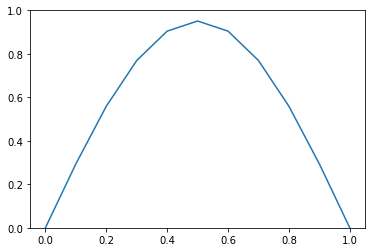

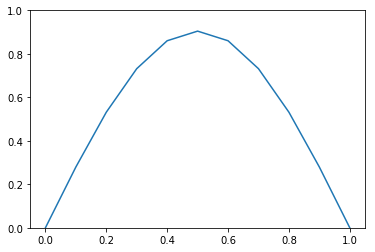

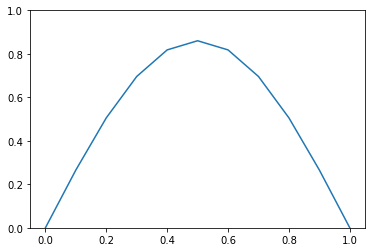

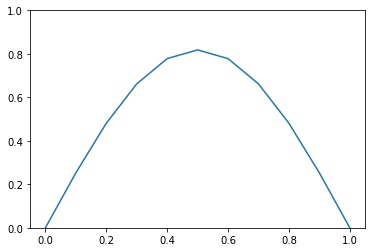

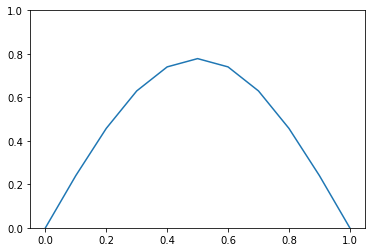

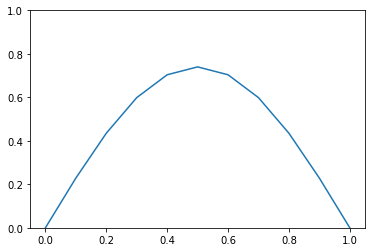

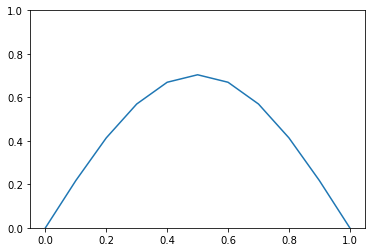

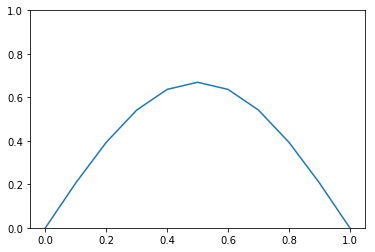

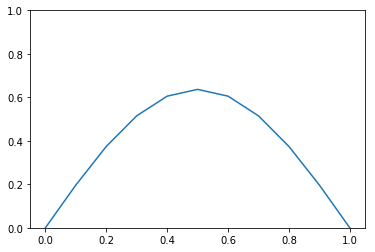

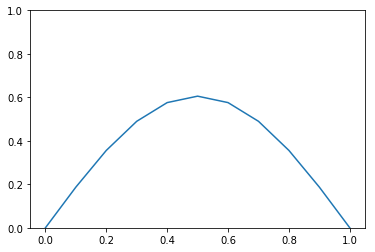

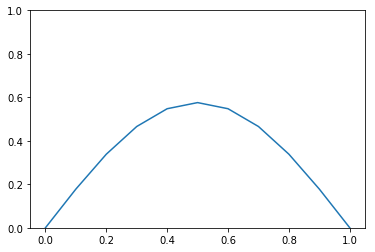

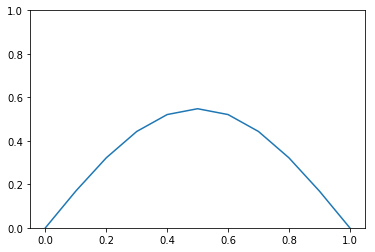

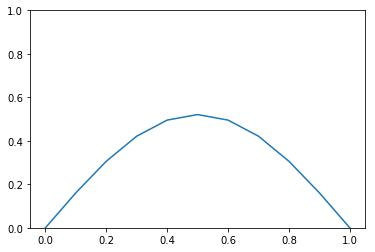

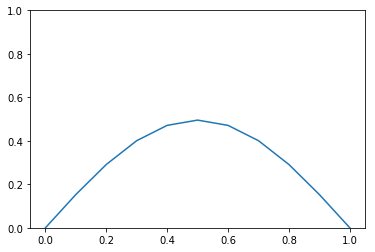

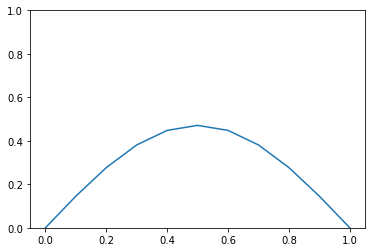

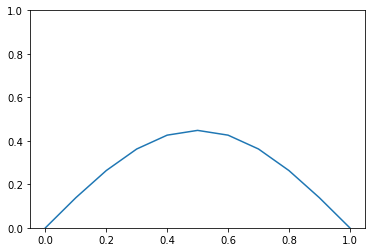

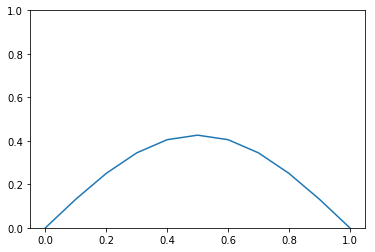

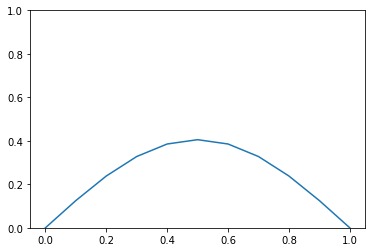

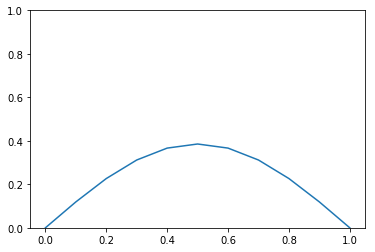

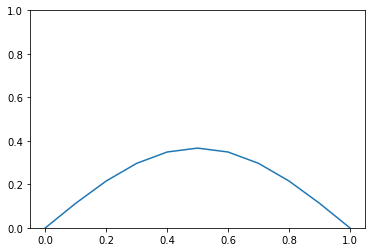

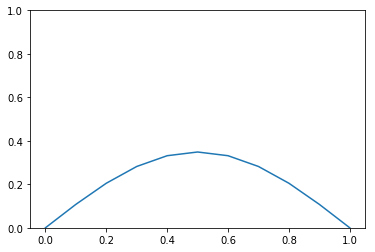

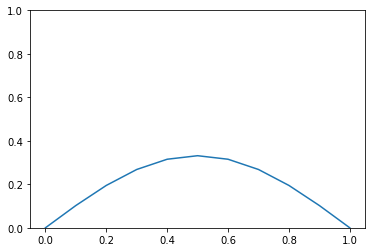

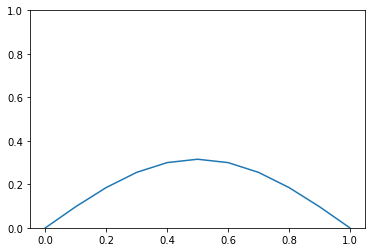

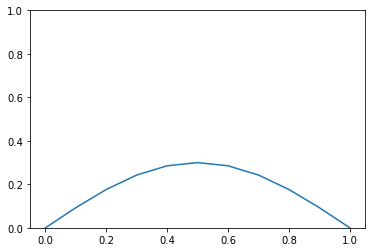

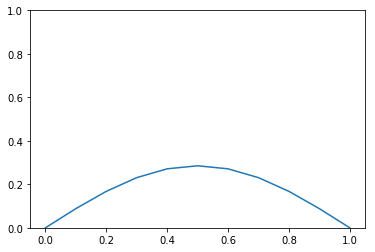

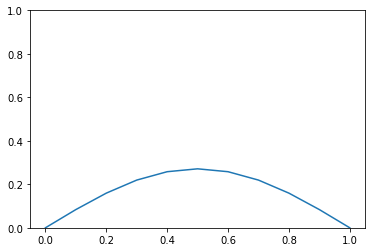

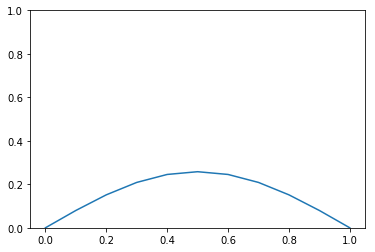

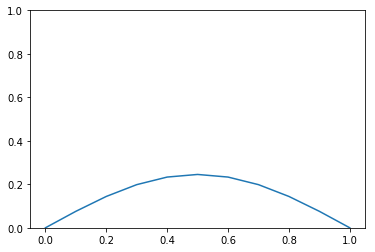

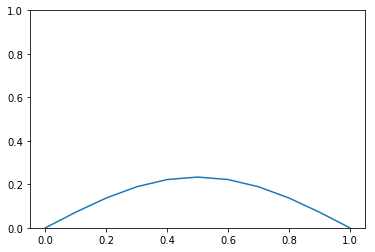

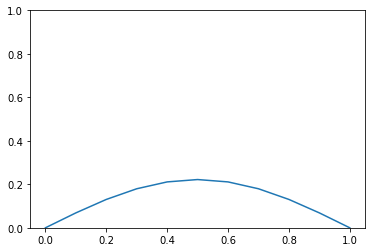

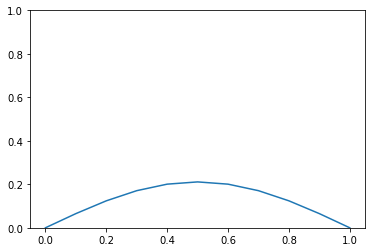

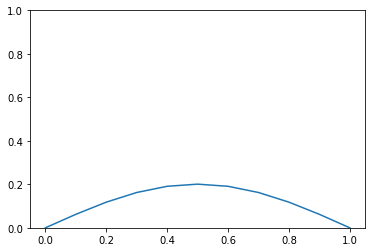

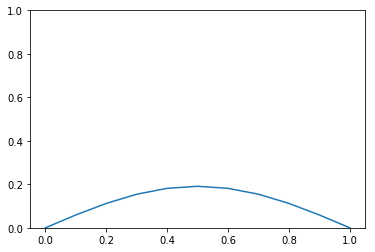

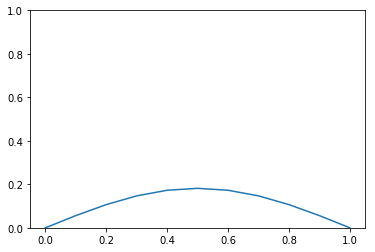

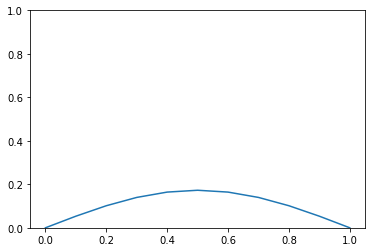

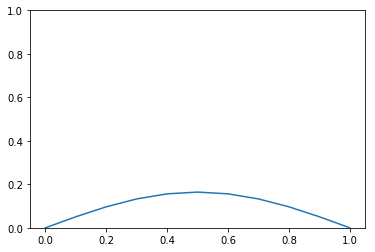

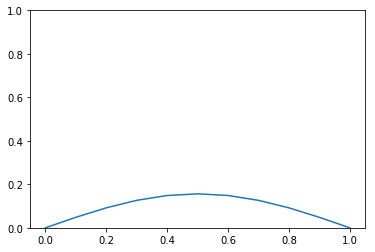

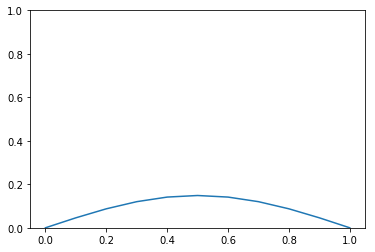

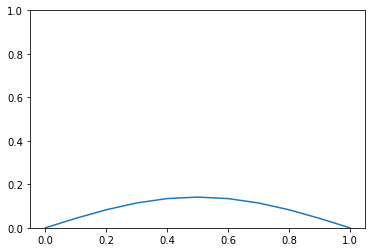

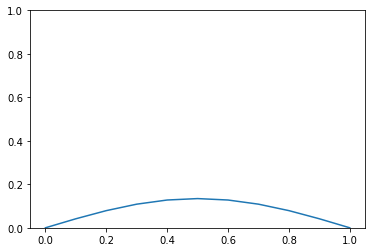

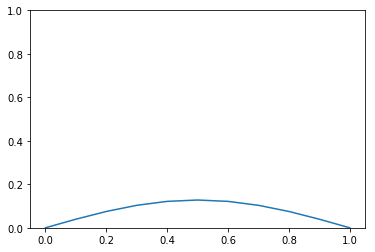

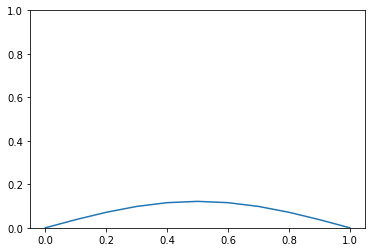

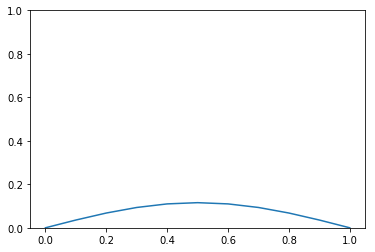

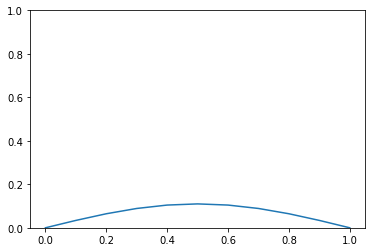

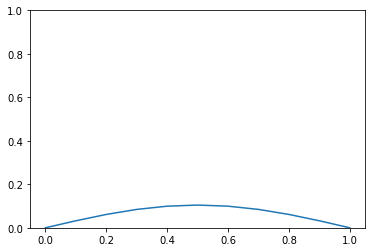

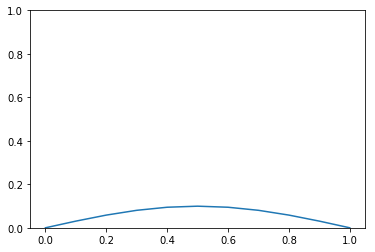

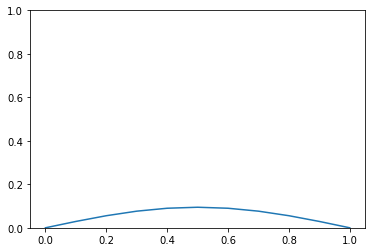

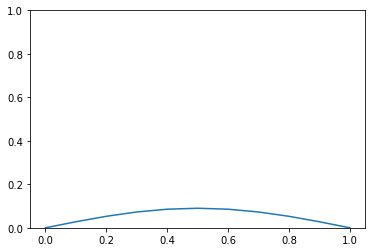

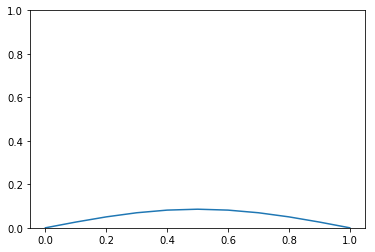

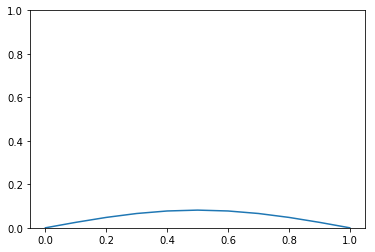

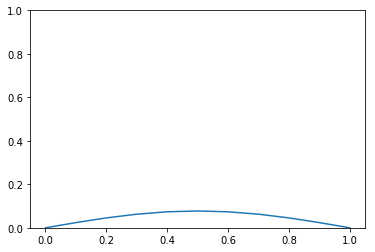

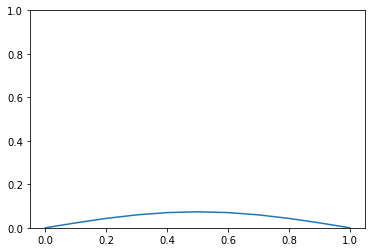

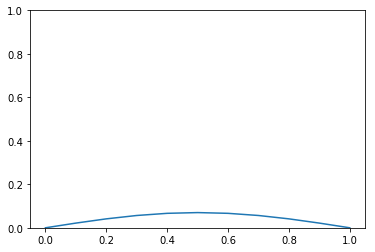

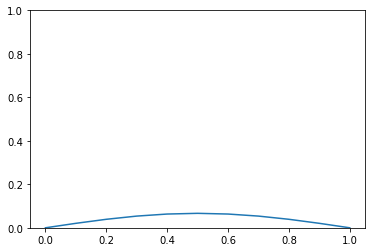

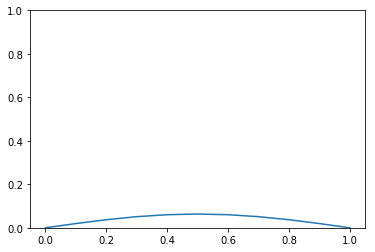

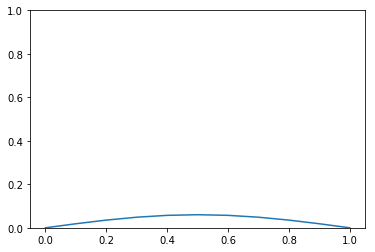

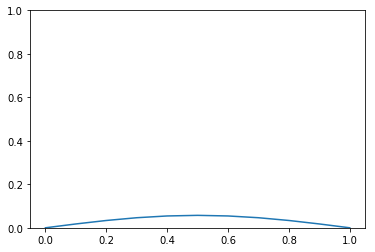

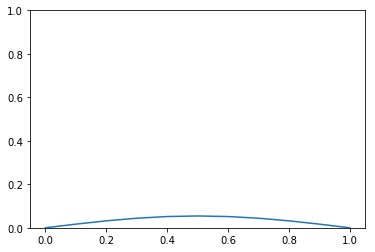

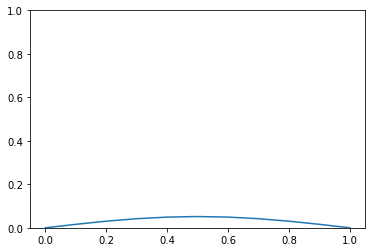

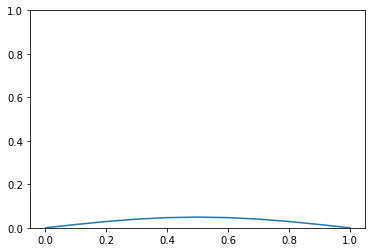

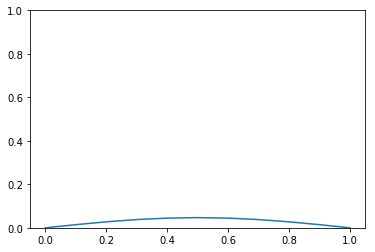

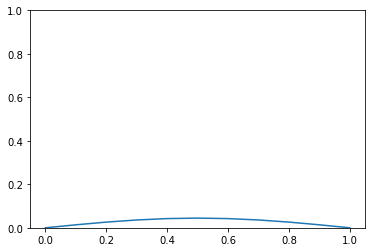

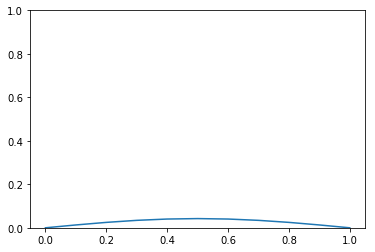

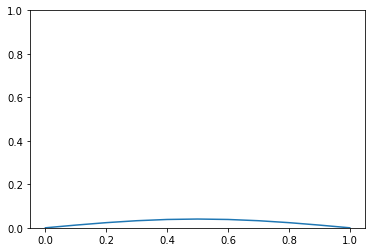

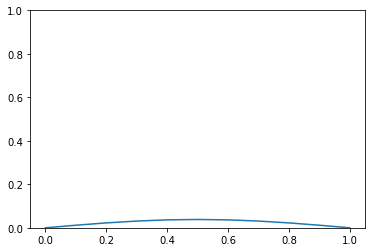

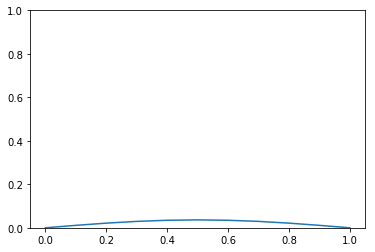

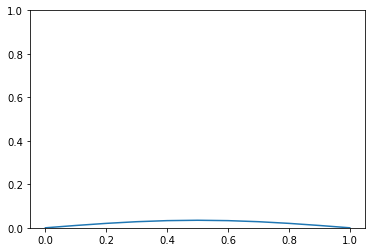

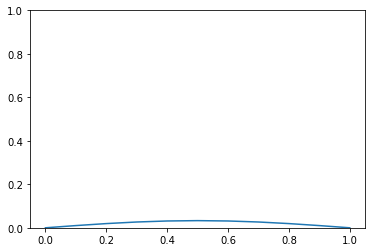

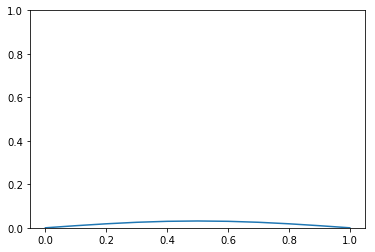

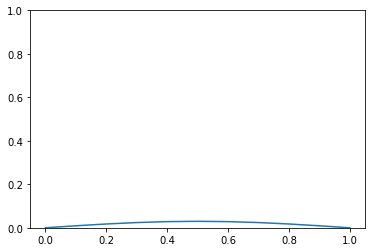

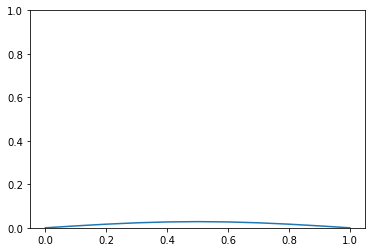

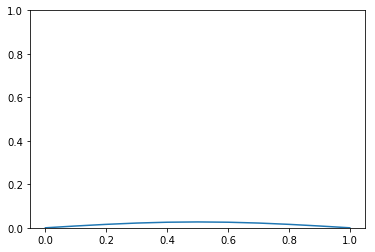

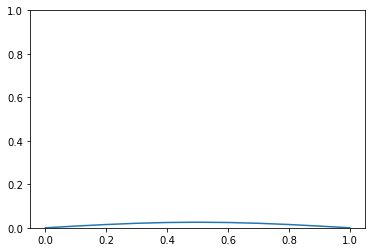

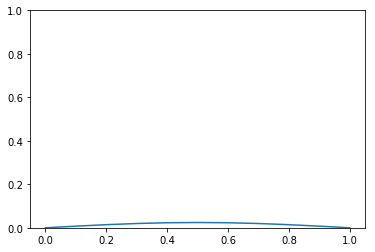

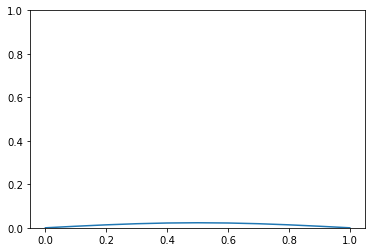

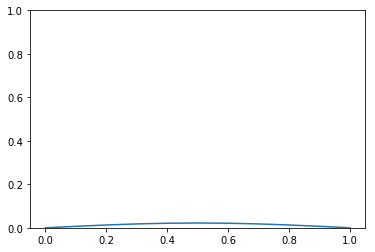

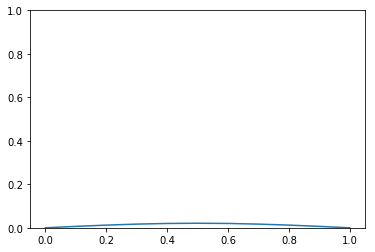

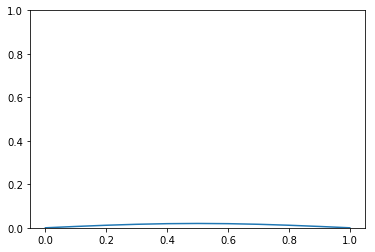

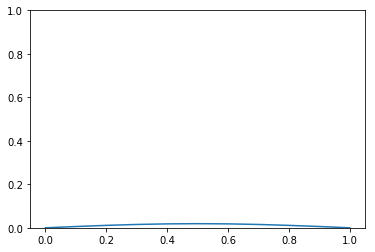

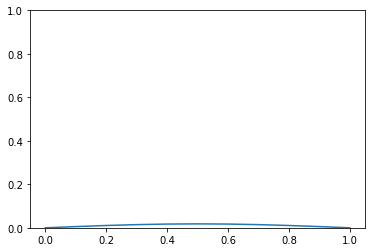

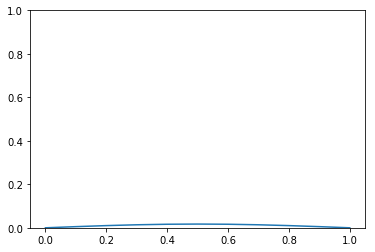

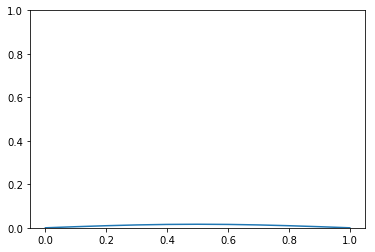

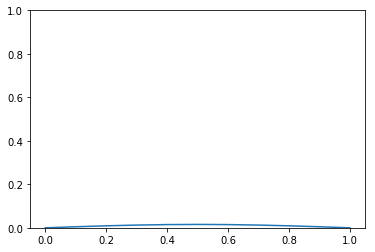

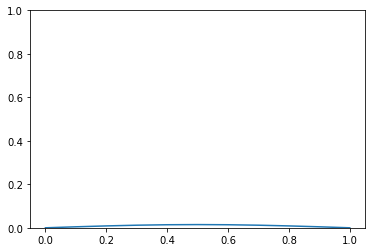

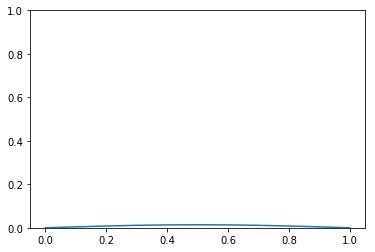

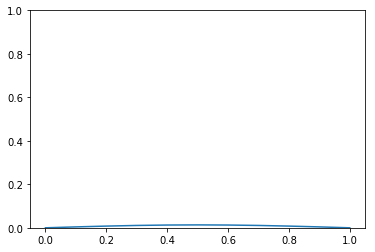

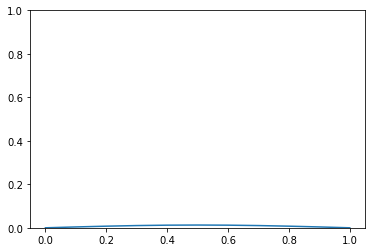

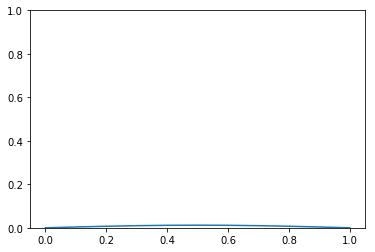

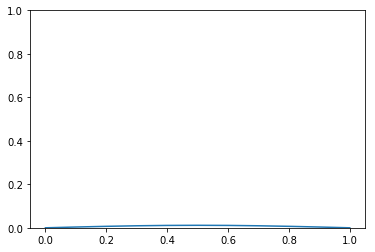

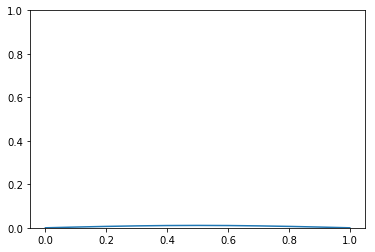

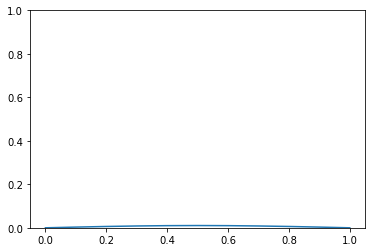

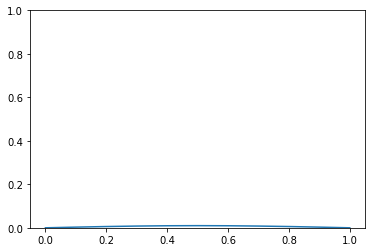

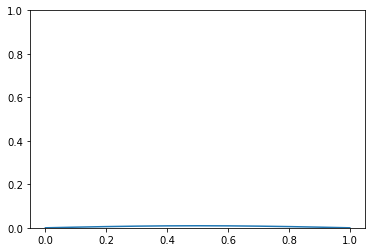

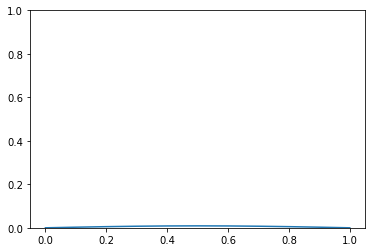

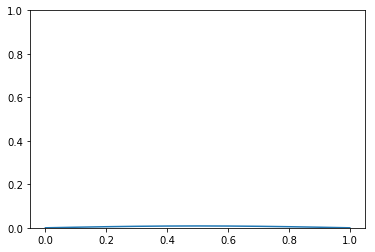

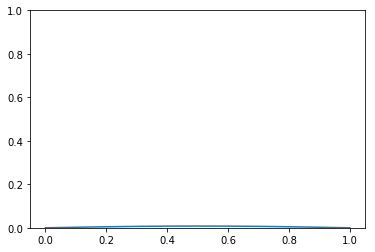

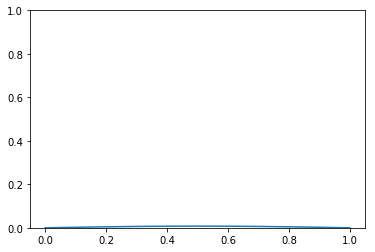

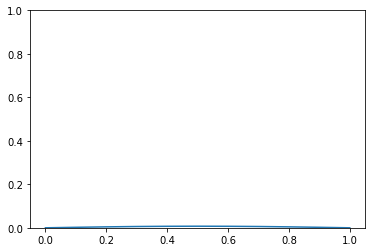

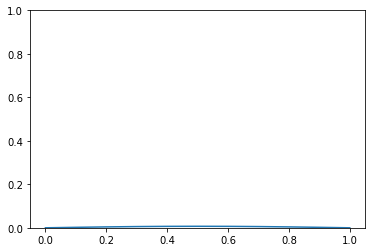

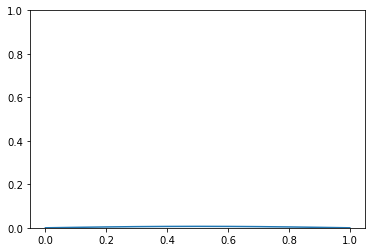

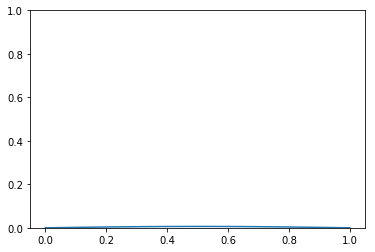

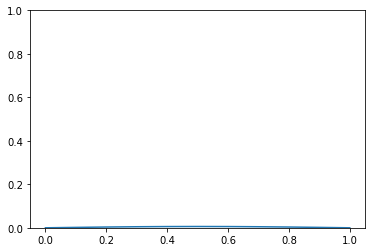

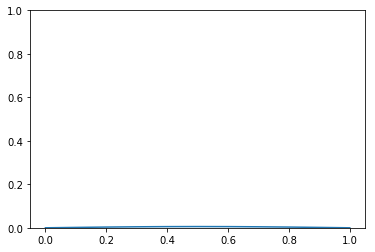

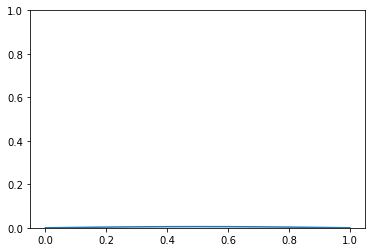

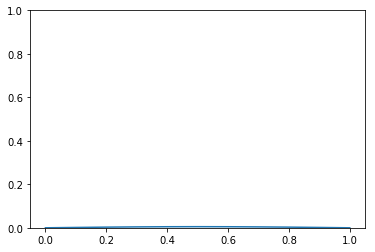

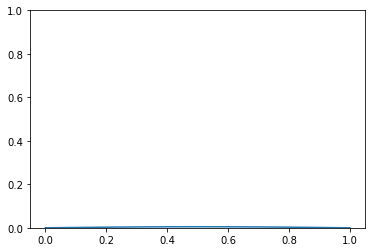

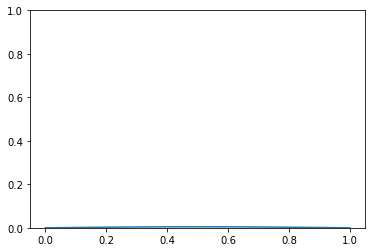

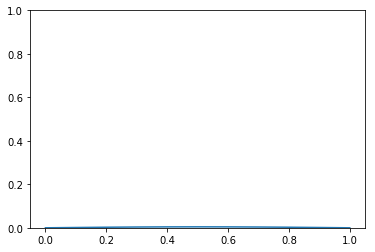

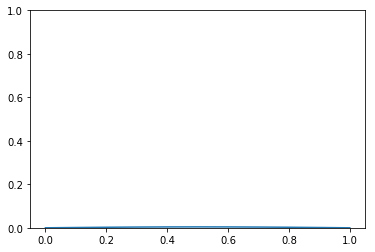

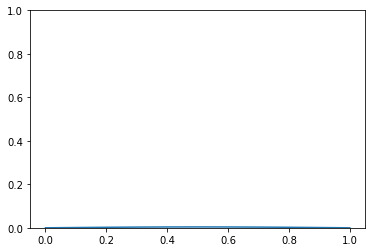

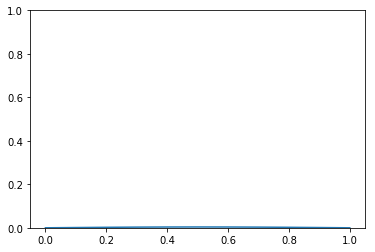

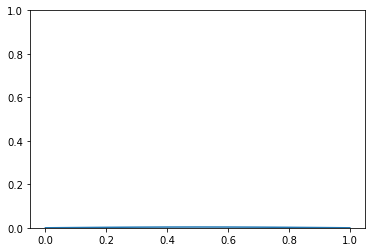

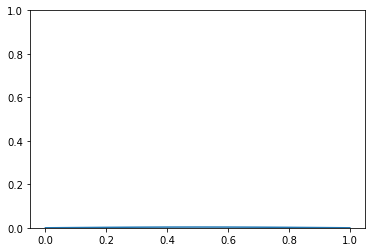

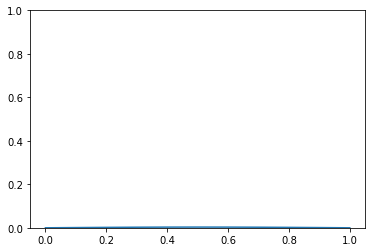

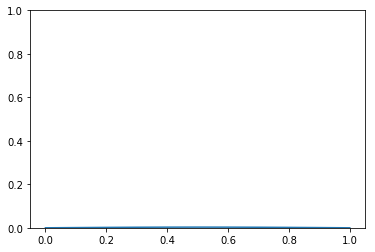

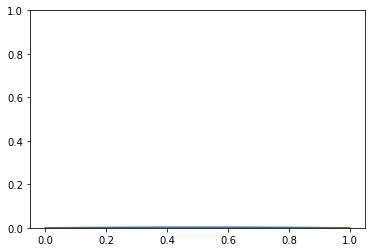

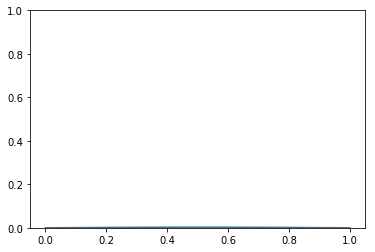

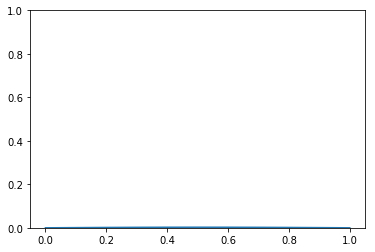

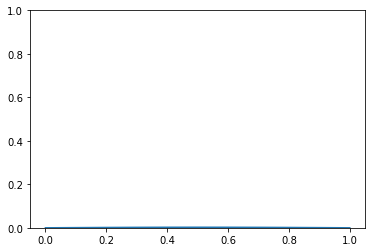

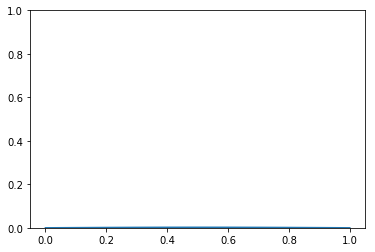

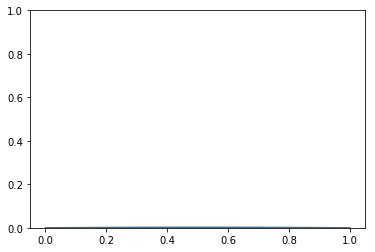

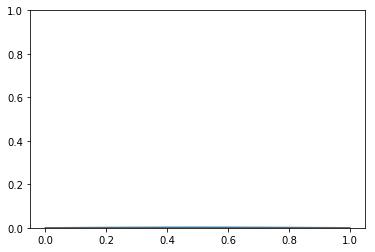

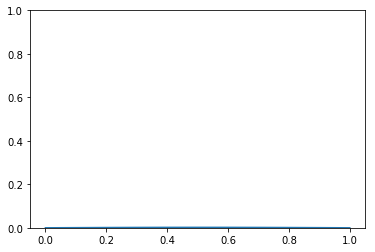

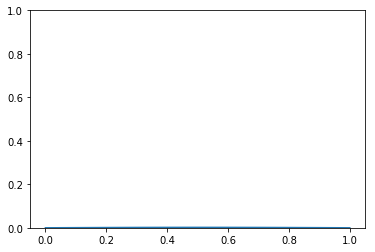

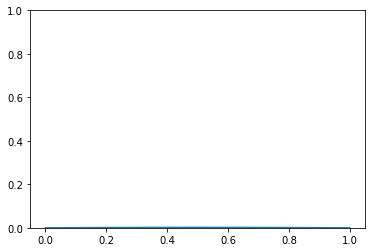

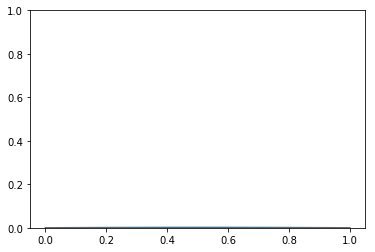

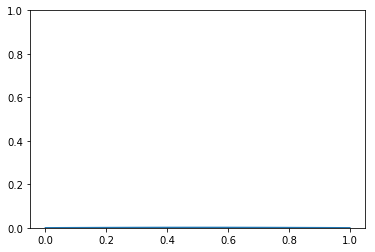

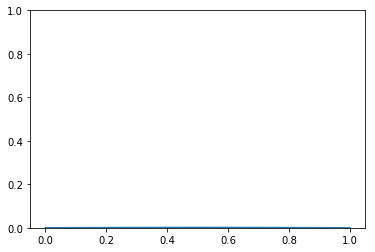

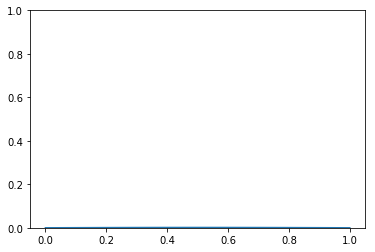

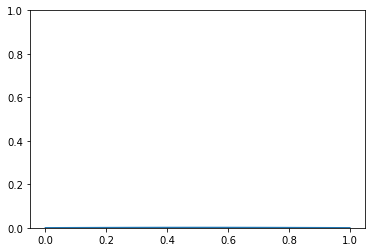

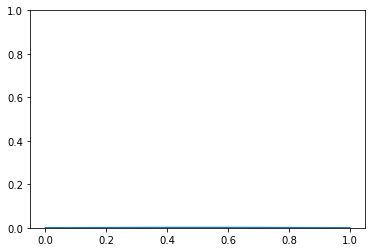

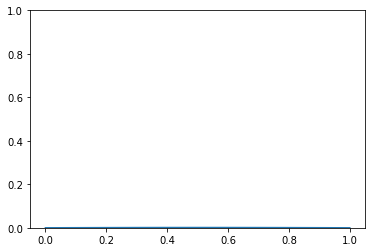

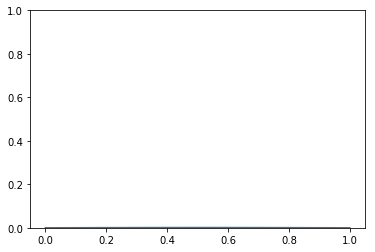

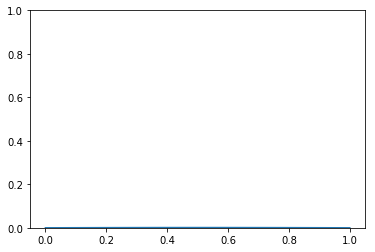

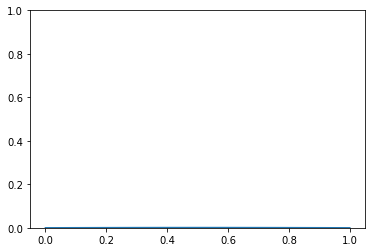

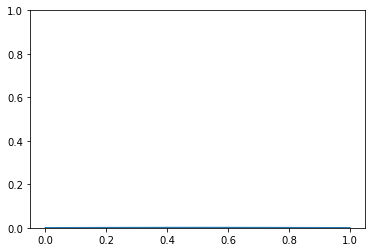

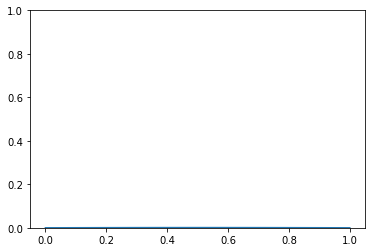

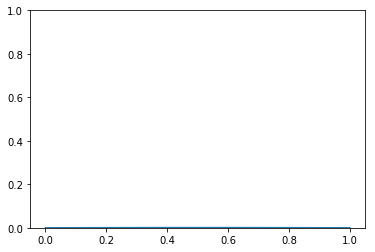

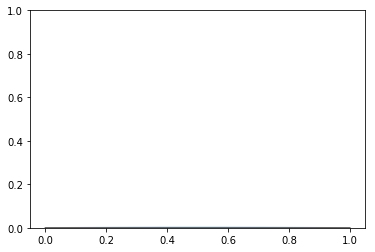

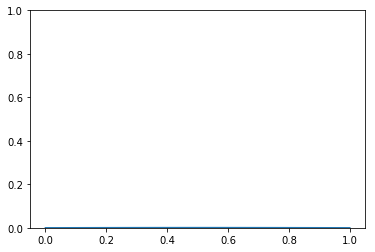

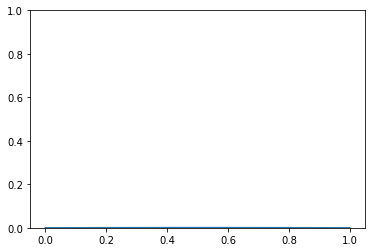

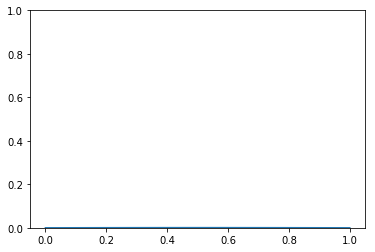

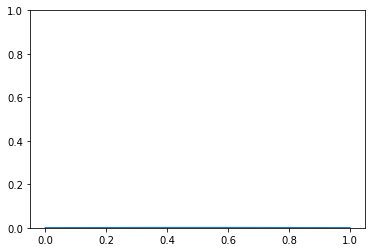

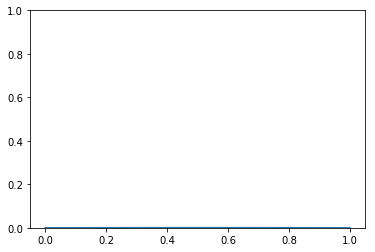

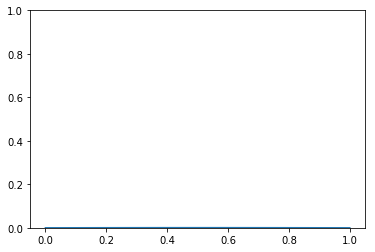

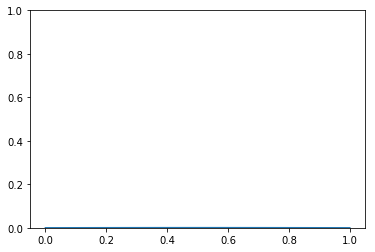

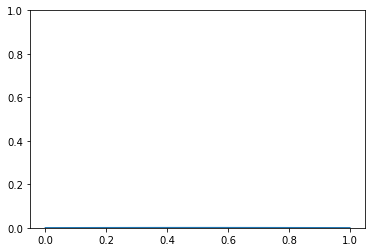

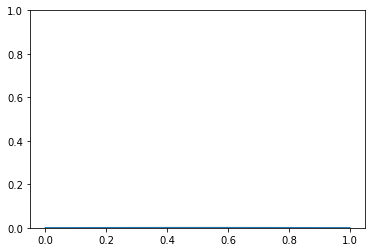

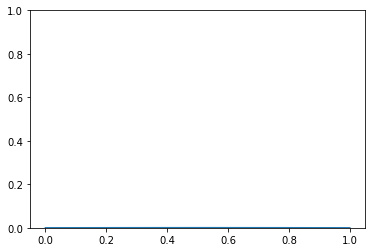

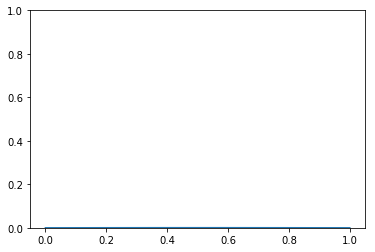

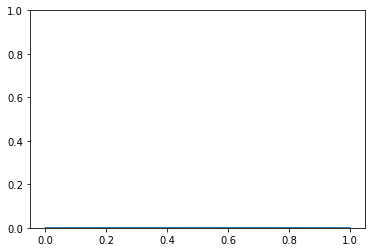

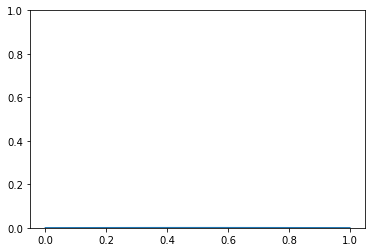

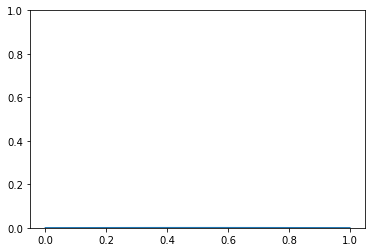

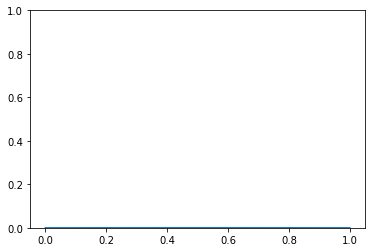

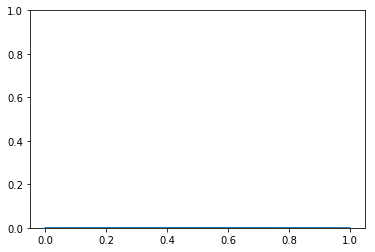

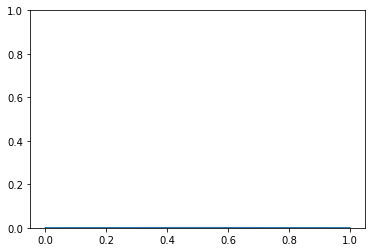

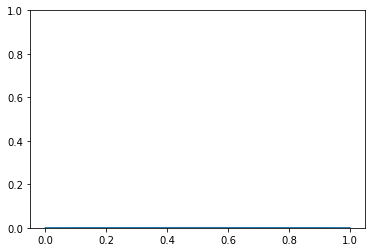

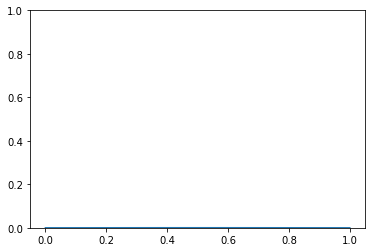

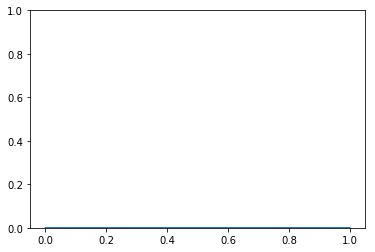

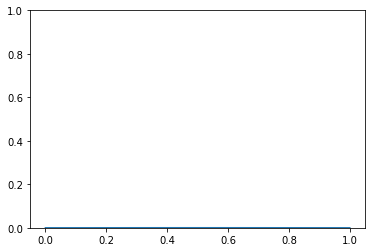

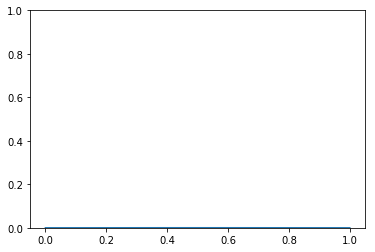

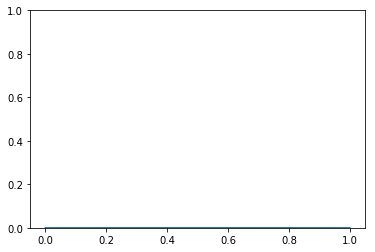

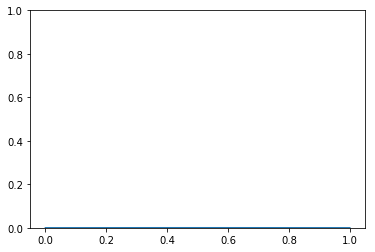

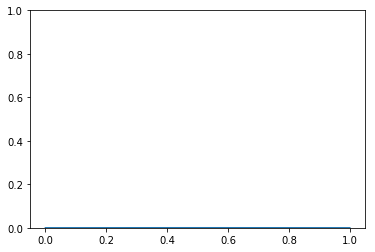

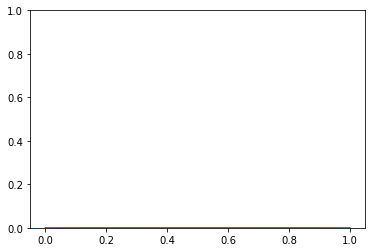

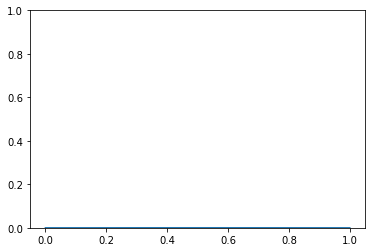

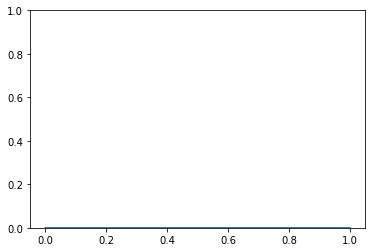

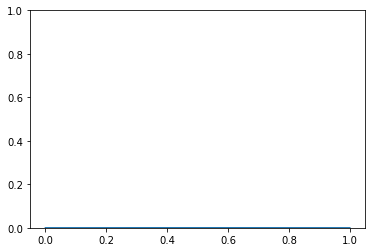

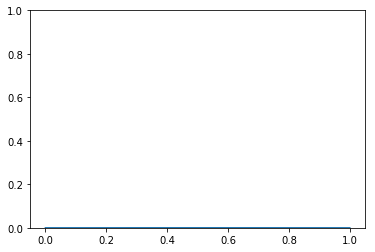

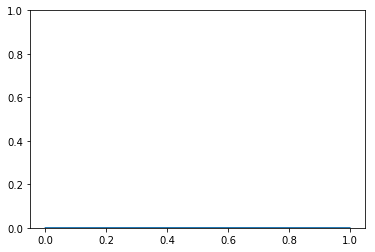

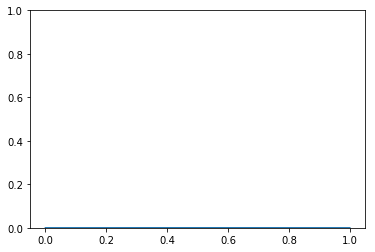

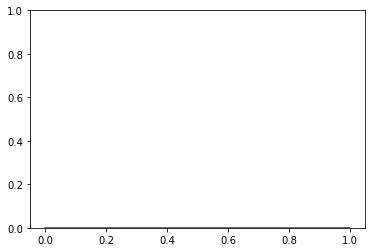

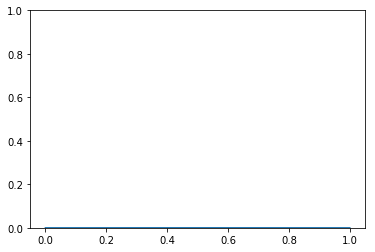

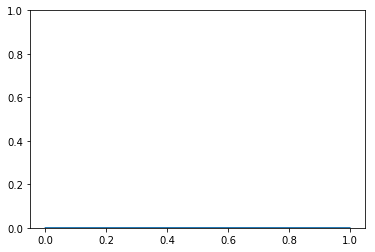

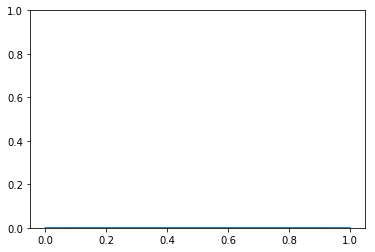

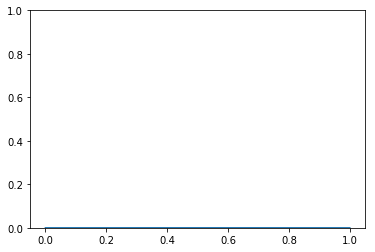

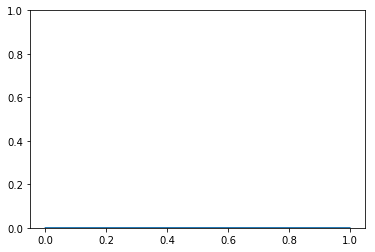

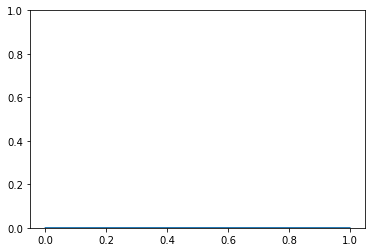

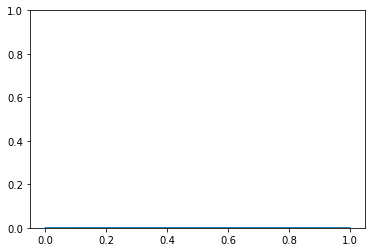

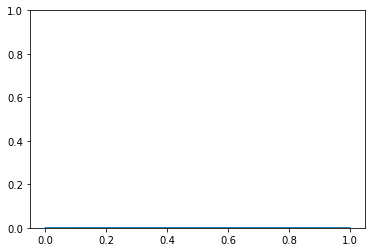

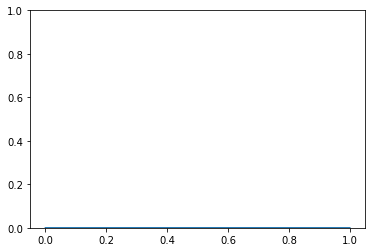

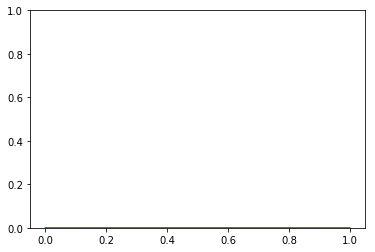

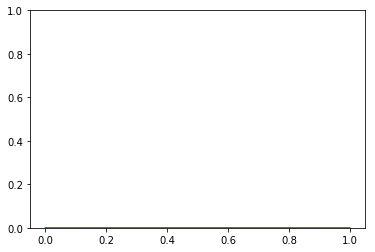

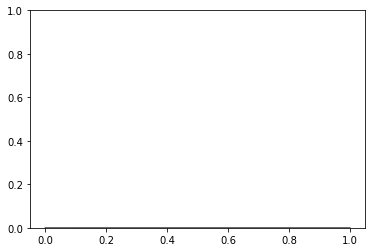

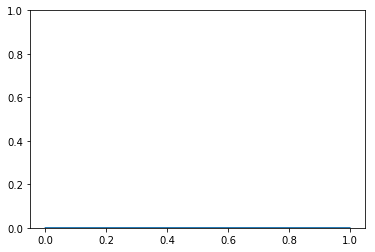

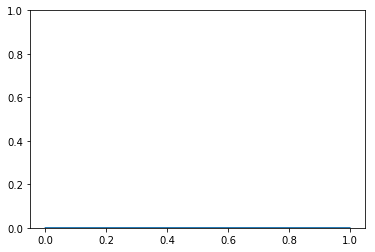

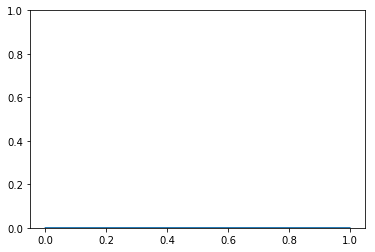

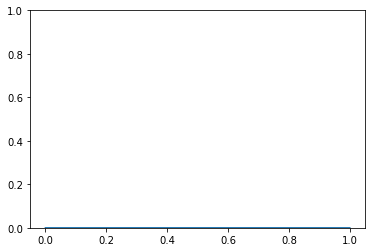

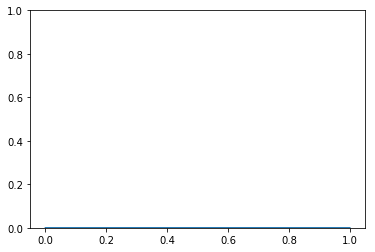

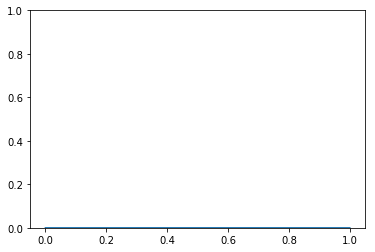

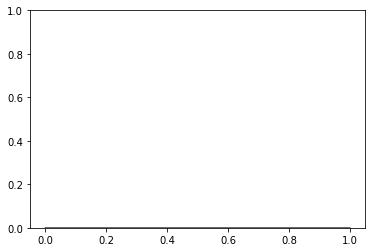

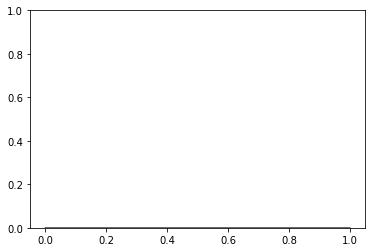

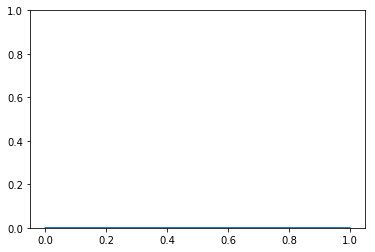

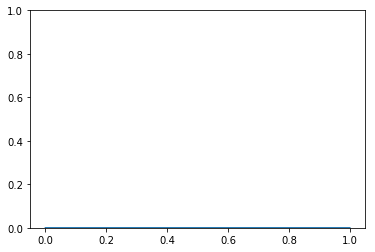

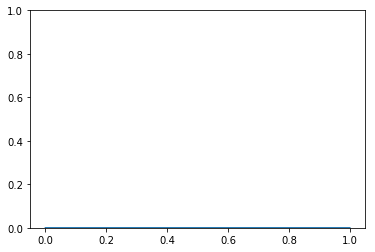

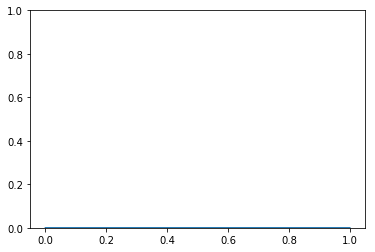

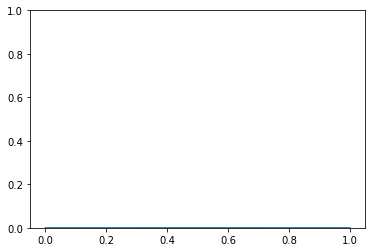

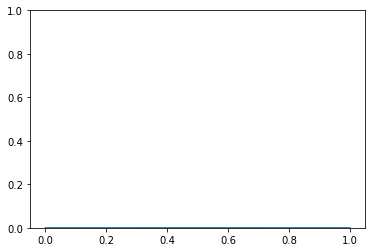

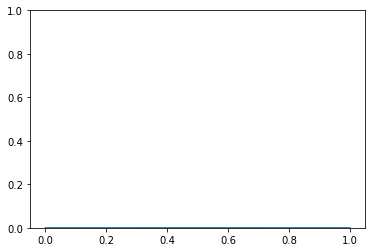

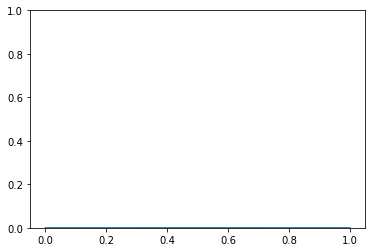

In [36]:
import numpy as np
import scipy as sp
import scipy.sparse.linalg as linalg
import matplotlib.pyplot as plt

#griddding
k = 200 #number of steps per 1 second
n = 10#number of space steps

time = 1 #sec

dx = 1/n  #length of one space step
dt = 1/k  #length of one time step
alpha = 1   #speed
r = alpha*dt/dx**2 #Stable factor should be less 1/2
total_time_steps = int(time/dt) #total time steps
print("Stable factor:", r)

x = np.linspace(0, 1, n+1)

#initial condition
u = np.zeros((n+1, total_time_steps+1))
u[:, 0] = np.sin(np.pi*x) #u(x,0)= f(x)
u[0, :] = 0
u[n, :] = 0

# scheme of solving
# theta = 0 (explicit scheme), theta = 1 (implicit scheme), and theta = 1/2 (Crank-Nicolson scheme)
theta = 0

#buildin of matrix A
a = np.ones(n-1)*(1/dt+2*alpha*theta/dx**2)
b = c = np.ones(n-1)*(-alpha*theta/dx**2)
A = sp.sparse.dia_matrix(([b, a, c], [-1, 0, 1]), [n-1, n-1]).toarray()

d = np.zeros(n-1)
i = np.arange(1, n)

for t in range(0, total_time_steps):
    #Building of vector d
    d[i-1] = alpha*(1 - theta)/dx**2*u[i-1, t]\
             + (1/dt-2*alpha*(1 - theta)/dx**2)*u[i, t]\
             + alpha*(1 - theta)/dx**2*u[i+1, t]
    # solving
    u[1:n, t+1] = np.linalg.solve(A, d)
    #ploting
    plt.plot(x, u[:, t+1])
    plt.ylim([0, 1])
    plt.show()